# The SPEXone L2-data

In this notebook we will take a look at some of the Level-2 data products, which have been generated by the aerosol retrieval algorithm called "RemoTAP" (Remote Sensing of Trace Gases and Aerosol Products).

## Summary
This is an introduction into working with and visualisation of SPEXone Level-2 data. SPEXone Level-2 data contains aerosol characterization data obtained with the RemoteTAP retrieval algorithm that used SPEXone Level-1 data and other ancillary data as input.

## Learning objectives
At the end of this tutorial you will know:
- How to download SPEXone Level-2 data from the data archive.
- What is the content of a SPEXone Level-2 file.
- How to interpret the cloud-fraction and quality flag data.
- How to plot aerosol characterization data.
- How to apply a mask to the data.
- How to find your favorite scene and process the data.

## Contents
1. [Setup](#setup)
2. [Get and inspect the Level-2 data](#get-and-inspect-the-level-2-data)
3. [Diagnostic data: cloud fraction and quality flag](#diagnostic-data-cloud-fraction-and-quality-flagh2)
4. [Aerosol characterization data](#aerosol-characterization-data)
5. [Do it yourself](#do-it-yourself)

## Setup

In [1]:
import earthaccess
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

In [2]:
# Function needed later
def adjust_quality_flag(qf):
    qf_mod = [[0, 0], [1, 1], [2, 2], [3, 4], [12, 3], [13, 5], [23, 6], [123, 7]]
    for mod in qf_mod:
        qf.data[qf.data == mod[0]] = mod[1]

    return qf

### Get and inspect the Level-2 data
We will download the L2-data derived from the same L1C-file as in the previous tutorial, but feel free to use a different L1C-file of your liking.

In [3]:
# Let's first find L2-data over land
bbox = (-119.5, -20.5, 120, -19.5)  # W S E N corners of the box
temporal = ("2025-06-23", "2025-06-23")
short_name = "PACE_SPEXONE_L2_AER_RTAPLAND_NRT"
results_land = earthaccess.search_data(
    short_name = short_name,
    temporal = temporal,
    bounding_box = bbox,
)
l2_path_land = earthaccess.download(results_land[0], "./data")[0]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# And next L2-data over ocean
bbox = (-119.5, -20.5, 120, -19.5)  # W S E N corners of the box
temporal = ("2025-06-23", "2025-06-23")
short_name = "PACE_SPEXONE_L2_AER_RTAPOCEAN_NRT"
results_ocean = earthaccess.search_data(
    short_name = short_name,
    temporal = temporal,
    bounding_box = bbox,
)
l2_path_ocean = earthaccess.download(results_ocean[0], "./data")[0]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Next, we load the data into memory


In [5]:
l2_data = xr.open_dataset(l2_path_land, group="geophysical_data")
l2d_data = xr.open_dataset(l2_path_land, group="diagnostic_data")
l2_geo = xr.open_dataset(l2_path_land, group="geolocation_data").set_coords(("longitude", "latitude"))
l2_data_land = xr.merge((l2_data, l2d_data, l2_geo))

l2_data = xr.open_dataset(l2_path_ocean, group="geophysical_data")
l2d_data = xr.open_dataset(l2_path_ocean, group="diagnostic_data")
l2_geo = xr.open_dataset(l2_path_ocean, group="geolocation_data").set_coords(("longitude", "latitude"))
l2_data_ocean = xr.merge((l2_data, l2d_data, l2_geo))

/var/folders/t7/6cqb3z3d3ls_zmvgq5_362140000gn/T/ipykernel_66101/2182653654.py:2: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  l2d_data = xr.open_dataset(l2_path_land, group="diagnostic_data")
/var/folders/t7/6cqb3z3d3ls_zmvgq5_362140000gn/T/ipykernel_66101/2182653654.py:7: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presenc

Let's have a look at the content of "l2_data_land"-variable, which contains all data from  "geophysical_data"-group and the "diagnostic_data"-group:

In [6]:
l2_data_land

<xarray.Dataset> Size: 53MB
Dimensions:                              (number_of_lines: 396,
                                          pixels_per_line: 29, wavelength: 34,
                                          wavelength3d: 18,
                                          number_of_time_profiling: 19,
                                          number_of_components_for_mode1: 4,
                                          number_of_components_for_mode2: 2,
                                          number_of_components_for_mode3: 1,
                                          number_of_views: 5)
Coordinates:
    latitude                             (number_of_lines, pixels_per_line) float32 46kB ...
    longitude                            (number_of_lines, pixels_per_line) float32 46kB ...
Dimensions without coordinates: number_of_lines, pixels_per_line, wavelength,
                                wavelength3d, number_of_time_profiling,
                                number_of_components_for_mode1,
                                number_of_components_for_mode2,
                                number_of_components_for_mode3, number_of_views
Data variables: (12/157)
    wind_speed                           (number_of_lines, pixels_per_line) float32 46kB ...
    wind_speed_uncertainty               (number_of_lines, pixels_per_line) float32 46kB ...
    chla                                 (number_of_lines, pixels_per_line) float32 46kB ...
    chla_uncertainty                     (number_of_lines, pixels_per_line) float32 46kB ...
    bpdf_scale                           (number_of_lines, pixels_per_line) float32 46kB ...
    bpdf_scale_uncertainty               (number_of_lines, pixels_per_line) float32 46kB ...
    ...                                   ...
    utc_date                             (number_of_lines, pixels_per_line) float64 92kB ...
    pixel_id                             (number_of_lines, pixels_per_line) float64 92kB ...
    sensor_zenith_angle                  (number_of_lines, pixels_per_line, number_of_views) float32 230kB ...
    relative_azimuth_angle               (number_of_lines, pixels_per_line, number_of_views) float32 230kB ...
    scattering_angle                     (number_of_lines, pixels_per_line, number_of_views) float32 230kB ...
    solar_zenith_angle                   (number_of_lines, pixels_per_line) float32 46kB ...

This is an overwhelmingly long list, but we will only use the most relevant data in this tutorial.

### Diagnostic data: cloud fraction and quality flag

Let's have a look at a few products by plotting the data on a map. We start with the cloud fraction and the quality flag:

/opt/homebrew/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/homebrew/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/homebrew/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/homebrew/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/homebrew/lib/python3.11/site-packages/cartopy/io/__init__.py:241: Download

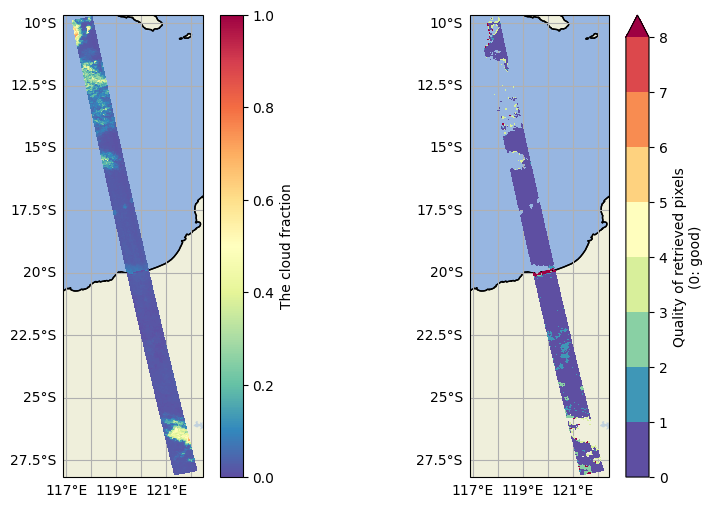

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0.15, right=1 - 0.21/2)

cmap = "Spectral_r"

# background for all panels
for ax in axs: 
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.coastlines()
    ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# cloud fraction
plot = l2_data_land["cloud_fraction"].plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=1,
        ax=axs[0], add_colorbar=True,
        zorder=5, rasterized=True
        )
plot = l2_data_ocean["cloud_fraction"].plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=1,
        ax=axs[0], add_colorbar=False,
        zorder=5, rasterized=True
        )

# quality flag
plot = l2_data_land["quality_flag"].plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=8,
        ax=axs[1], levels=9, add_colorbar=True,
        zorder=5, rasterized=True
        )
plot = l2_data_ocean["quality_flag"].plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=8,
        ax=axs[1], levels=9, add_colorbar=False,
        zorder=5, rasterized=True
        )

Compare the 'cloud fraction' image with the true-color image generated in tutorial 2. Does the 'cloud fraction' data make sense?

The quality flag indicates if an aerosol retrieval was succesful (0), if the chi2 was too high (1) and if the pixel in question was close to a land-water transition (2) or a cloud (4), or a combination of these values. Can you correlate the quality flag to the geographical situation and the cloud-fraction image? Hint: the threshold for a cloud-free scene for which an aerosol retrieval is attempted is typically 0.05.

### Aerosol characterization data
Next, we will look at the main aerosol products: Aerosol Optical Thickness (AOT), Ångstrom Exponent (AE) and Single Scattering Albedo.

For AOT, we have to select a particular wavelength, since this property is retrieved at several distinct wavelengths. We choose wavelength index 7. Can you figure out which wavelength this is?

In addition, we plot the total AOT, the 'coarse mode' AOT (larger particles) and 'fine mode' AOT (smaller particles).

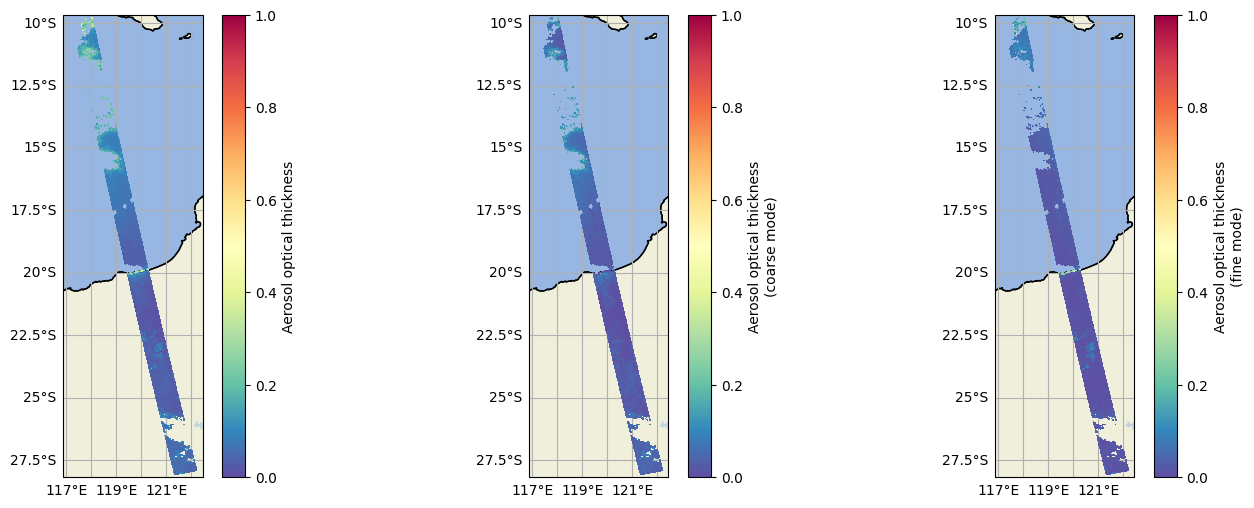

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0.15/3, right=1 - 0.21/3)

cmap = "Spectral_r"

# prepare the background of the panels
for ax in axs:
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.coastlines()
    ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# add AOT to the first panel
plot = l2_data_land["aot"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=1,
        ax=axs[0], add_colorbar=True,
        zorder=5, rasterized=True
        )
plot = l2_data_ocean["aot"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=1,
        ax=axs[0], add_colorbar=False,
        zorder=5, rasterized=True
        )

# add coarse AOT to the second panel
plot = l2_data_land["aot_coarse"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=1,
        ax=axs[1], add_colorbar=True,
        zorder=5, rasterized=True
        )
plot = l2_data_ocean["aot_coarse"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=1,
        ax=axs[1], add_colorbar=False,
        zorder=5, rasterized=True
        )

# add fine AOT to the third panel
plot = l2_data_land["aot_fine"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=1,
        ax=axs[2], add_colorbar=True,
        zorder=5, rasterized=True
        )
plot = l2_data_ocean["aot_fine"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=1,
        ax=axs[2], add_colorbar=False,
        zorder=5, rasterized=True
        )

Similarly, for the Ångstrom Exponent (AE), we select the "440-670 nm"-variant. This parameter describes how the aerosol optical thickness depends on the wavelength of the light, and is inversely proportional to the average size of the aerosols.

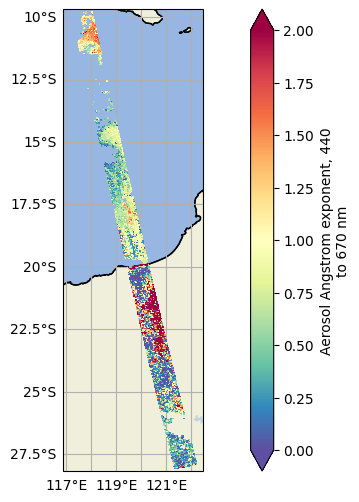

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0.15/1, right=1 - 0.21/1)

cmap = "Spectral_r"

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plot = l2_data_land["angstrom_440_670"].plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=2,
        ax=ax, add_colorbar=True,
        zorder=5, rasterized=True
        )
plot = l2_data_ocean["angstrom_440_670"].plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0, vmax=2,
        ax=ax, add_colorbar=False,
        zorder=5, rasterized=True
        )

Finally, we plot the Single Scattering Albedo (SSA), which is ratio of scattering efficiency to the total extinction efficiency. Therefore, the SSA is a measure of for the absorptive nature of the aerosols. An SSA of 1 means that all light extinction is due to scattering, while an SSA of 0 means that all light extinction is due to absorbtion.

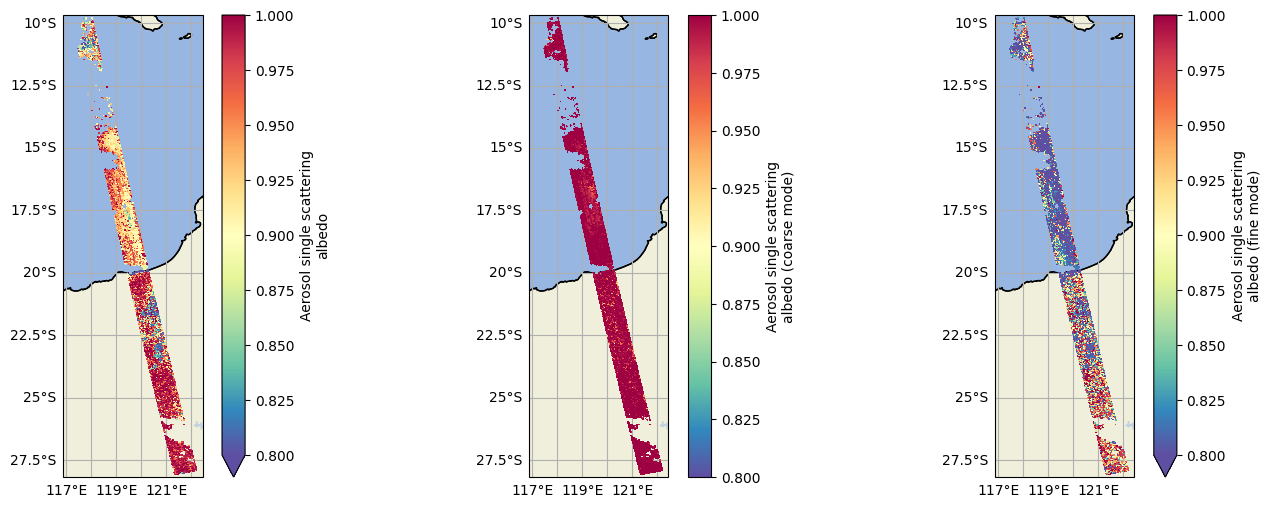

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0.15/3, right=1 - 0.21/3)

cmap = "Spectral_r"

# prepare the background of the panels
for ax in axs:
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.coastlines()
    ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# first panel SSA
plot = l2_data_land["ssa"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0.8, vmax=1,
        ax=axs[0], add_colorbar=True,
        zorder=5, rasterized=True
        )
plot = l2_data_ocean["ssa"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0.8, vmax=1,
        ax=axs[0], add_colorbar=False,
        zorder=5, rasterized=True
        )

# first panel coarse SSA
plot = l2_data_land["ssa_coarse"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0.8, vmax=1,
        ax=axs[1], add_colorbar=True,
        zorder=5, rasterized=True
        )
plot = l2_data_ocean["ssa_coarse"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0.8, vmax=1,
        ax=axs[1], add_colorbar=False,
        zorder=5, rasterized=True
        )

# first panel fine SSA
plot = l2_data_land["ssa_fine"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0.8, vmax=1,
        ax=axs[2], add_colorbar=True,
        zorder=5, rasterized=True
        )
plot = l2_data_ocean["ssa_fine"].sel({"wavelength3d": 7}).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0.8, vmax=1,
        ax=axs[2], add_colorbar=False,
        zorder=5, rasterized=True
        )

As you can see, in the default scene the AOT is rather low and as a result, the retrieved AE and SSA are not very accurate and thereby rather noisy.

In addition, the SSA shows some unrealistic spatial variance above and below 22.5 S and 120.5 E. Let's see what happens if we apply a filter using the quality flag and only allow data for which the quality flag equals 0.

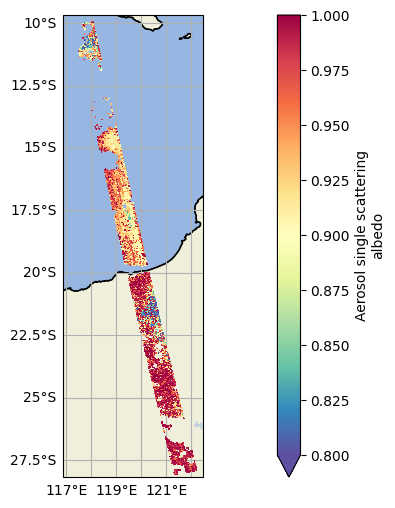

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(17, 6), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0.15/3, right=1 - 0.21/3)

cmap = "Spectral_r"

# prepare the background of the panels
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# first panel SSA
plot = l2_data_land["ssa"].sel({"wavelength3d": 7}).where(l2_data_land["quality_flag"] == 0).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0.8, vmax=1,
        ax=ax, add_colorbar=True,
        zorder=5, rasterized=True
        )
plot = l2_data_ocean["ssa"].sel({"wavelength3d": 7}).where(l2_data_ocean["quality_flag"] == 0).plot(x="longitude", y="latitude",
        cmap=cmap, vmin=0.8, vmax=1,
        ax=ax, add_colorbar=False,
        zorder=5, rasterized=True
        )

Apparenty, the lower SSA below 22.5 S and 120.5 E is now masked, and judging from the cloud fraction data above, these pixels appear to have yielded a low quality aerosol retrieval due to a small, but non-zero cloud-fraction. The lower SSA above 22.5 S and 120.5 E appears to have resulted from a good quality fit. Could this point to human activities in this area?

### Do it yourself

Can you find a scene in the SPEXone archive that has a high AOT?

Tip: use https://worldview.earthdata.nasa.gov/, use 'Add layers' to search for 'OCI', and add the PACE ground track via 'Base layers' -> 'PACE/OCI' -> 'View Options'.

Look for fires (smoke) over e.g. Africa, Canada or Siberia, desert dust over the Sahara or Middle-East, or pollution over India or China.

Right-click on a scene to find the coordinates, which you can use in the earthaccess search tool.